# Convergence of Estimated CDFs to True CDF

Wanting to do a marginal transformation to heavy tailed marginals, but it seems that the coverage is really bad when we estimated the marginals instead of using the true marginals. This seems kind of weird, so let's at least check if we have good convergence..

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)

source('~/isolines_uq/scripts/R/confidence_regions_procedure/auxiliary_scripts/utils.R')

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘data.table’ was built under R version 4.2.3”

Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: mgcv

Warning message:
“package ‘mgcv’ was built under R version 4.2.3”
Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-42. For overview type 'h

In [70]:
n <- 10000
gamma <- 1/2

n_replicates <- 100
sup_diffs <- rep(NA, n_replicates)

for (i in 1:n_replicates) {

    dat <- rt(n, df=1)
    cdf_estimate <- est_cdf(dat, dat, gamma)


    sup_diffs[i] <- max(abs(cdf_estimate - true_cdf))

}

In [71]:
sup_diffs

[1] 0.9999000 0.9997000 0.9998388 0.9999302 0.9999069 0.9999381 0.9999020
  [8] 0.9999693 0.9999646 0.9999000 0.9999434 0.9999617 0.9999773 0.9999094
 [15] 0.9999817 0.9999042 0.9999364 0.9999553 0.9999000 0.9999000 0.9999605
 [22] 0.9999368 0.9999448 0.9999445 0.9999654 0.9999000 0.9999000 0.9999668
 [29] 0.9999139 0.9999000 0.9998000 0.9998000 0.9999861 0.9999000 0.9999699
 [36] 0.9999352 0.9999200 0.9999566 0.9999054 0.9999797 0.9999541 0.9999209
 [43] 0.9999794 0.9999670 0.9999912 0.9999549 0.9999028 0.9999000 0.9999000
 [50] 0.9999126 0.9999784 0.9999667 0.9999582 0.9999000 0.9999000 0.9999199
 [57] 0.9999000 0.9999000 0.9999895 0.9999482 0.9999000 0.9999399 0.9999935
 [64] 0.9999327 0.9999000 0.9999000 0.9999305 0.9999622 0.9999044 0.9999000
 [71] 0.9999400 0.9998551 0.9999000 0.9999000 0.9999740 0.9999000 0.9998171
 [78] 0.9999457 0.9999000 0.9999185 0.9999052 0.9999000 0.9999390 0.9999982
 [85] 0.9999204 0.9999717 0.9999000 0.9999295 0.9999386 0.9999509 0.9999561
 [92] 0.9999395 0.9999311 0.9999790 0.9999988 0.9999844 0.9999346 0.9999694
 [99] 0.9999000 0.9999000

In [72]:
inds <- sort(dat, index.return=TRUE)$ix

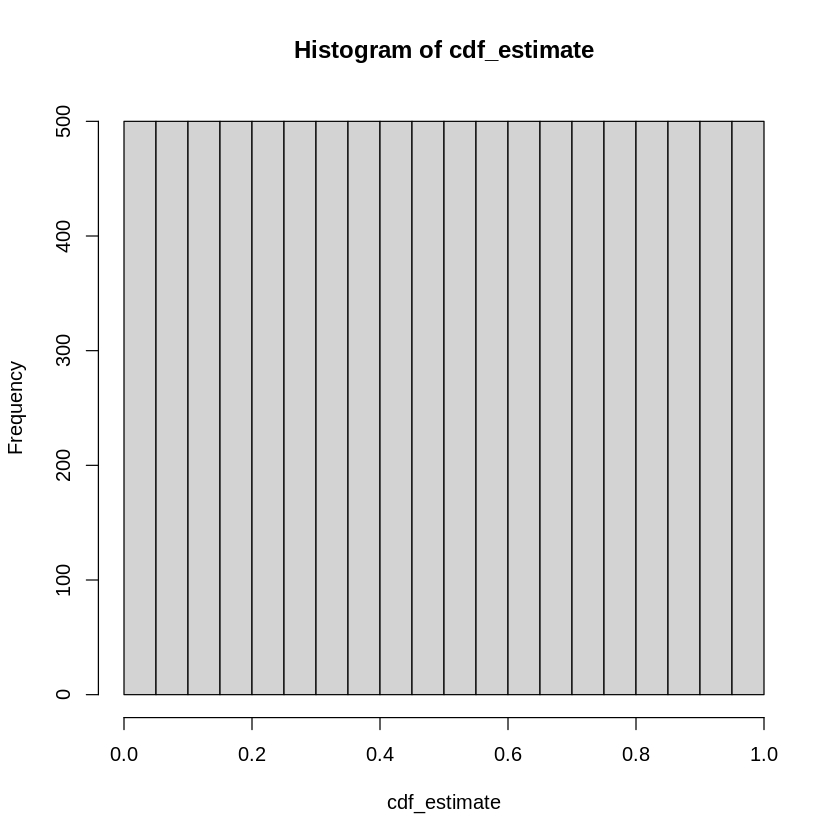

In [73]:
hist(cdf_estimate)

In [77]:
mean(cdf_estimate > 0.5)

[1] 0.5

In [22]:

threshold_prob <- length(dat)^(-gamma)
threshold <- quantile(dat, 1-threshold_prob)

In [23]:
threshold

99.68377% 
 97.86117

In [24]:
threshold_prob

[1] 0.003162278

In [25]:
gamma

[1] 0.5

In [20]:
length(dat)^(-gamma)

[1] 0.9642477